In [2]:
from queue import PriorityQueue
from itertools import combinations

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [53]:
class Node():
    def __init__(self,ID,name,x,y):
        self.ID=ID
        self.name=name
        self.x=x
        self.y=y
        self.h=float('inf')
        
    def update_heuristic_cost(self,dest):
        self.h=(((dest.x-self.x)**2 + (dest.y-self.y)**2)**.5)
        


In [54]:
# distances are uploaded in a csv file
df=pd.read_csv("distances.csv")
df

,ID,name,x,y
0,0,Chennai,810,100
1,1,Trichy,504,511
2,2,Madurai,386,716
3,3,Toothukudi,350,921
4,4,Salem,439,936
5,5,Nammakal,400,460
6,6,Thiruvannamalai,569,235
7,7,Coimbatore,171,526
8,8,Nilgiris,129,419
9,9,Erode,275,416


In [145]:

plt.ion()
class Graph():
    def __init__(self,df):
        self.df=df
        #self.nodes=[] #{location:["chennai","trichy"],x:[100,200],y:[...]}
        #self.add_nodes_from_df()
        self.calculate_distance_matrix()
        
    def add_nodes_from_df(self):
        for i in range(len(self.df)):
            ID,name,x,y=self.df.iloc[i]
            self.add_node(ID,name,x,y)
            
    def add_node(self,ID,name,x,y):
        node=Node(ID=ID,name=name,x=x,y=y)
        self.nodes.append(node)
    
    def calculate_distance_matrix(self):
        self.matrix=self.df[["name"]].copy()
        for i in range(len(self.df)):
            dest_row=self.df.iloc[i]
            dest_name=dest_row['name']
            #print(f"calculating distances to {dest_name}")
            
            self.matrix[dest_name]=self.df.apply(Graph.calc,args=(dest_row,),axis=1)
            
        #self.matrix.set_index("name",inplace=True)
        #display(self.matrix)
            
    @staticmethod
    def calc(source_row,dest_row):
        #print ("source_row",source_row)
        return (329/512.403162)*(((source_row['x']-dest_row['x'])**2 + (source_row['y']-dest_row['y'])**2)**.5)
        
   
    def plot_graph(self):
        plt.figure(figsize=(6,10))
        
        # display img first
        map_width=860
        map_height=1109
        im = plt.imread("map.png")
        plt.imshow(im,extent=(0,map_width,0,map_height))

        # now plot
        self.df["map_x"]=self.df["x"]
        self.df["map_y"]=self.df["y"].apply(lambda x:map_height-x)
        
        X=self.df["map_x"]
        Y=self.df["map_y"]
        labels=self.df["name"]
        
            
        plt.scatter(X,Y)
        
        for i, label in enumerate(labels):
            plt.text(X[i], Y[i], label, fontsize=8, ha='center', va='bottom', 
                     bbox=dict(facecolor='white', alpha=0.85, edgecolor='none', boxstyle='round,pad=0.5'))
        plt.axis(False)
        
    
    @staticmethod
    def calculate_euclidean_distance(coord1,coord2):
        x1,y1=coord1
        x2,y2=coord2
        return (329/512.403162)*(((x2-x1)**2 + (y2-y1)**2)**.5)
    
    def plot_travel(self,source_name,dest_name):
        source=self.df[self.df["name"]==source_name]
        dest=self.df[self.df["name"]==dest_name]
        
        X=[source['map_x'],dest['map_x']]
        Y=[source['map_y'],dest['map_y']]
       
        plt.plot(X,Y)
    

In [146]:
g=Graph(df)



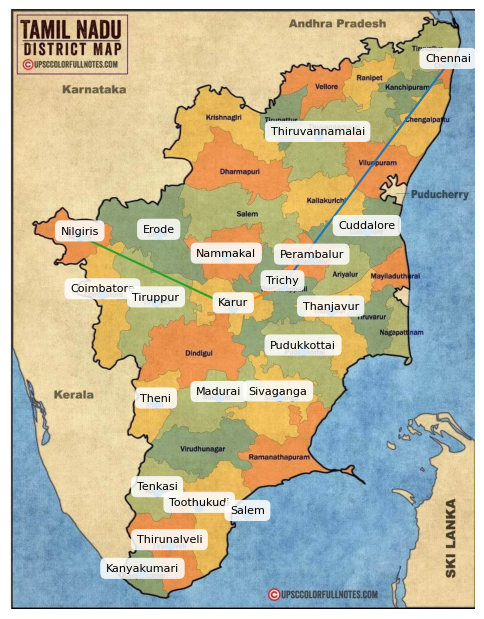

In [148]:
g.plot_graph()
g.plot_travel("Chennai","Trichy")
g.plot_travel("Trichy","Karur")
g.plot_travel("Karur","Nilgiris")
plt.show()